In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
import plotly.figure_factory as ff
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [24]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

# Hotel

In [13]:
df['hotel'].isnull().sum()

0

In [14]:
 df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

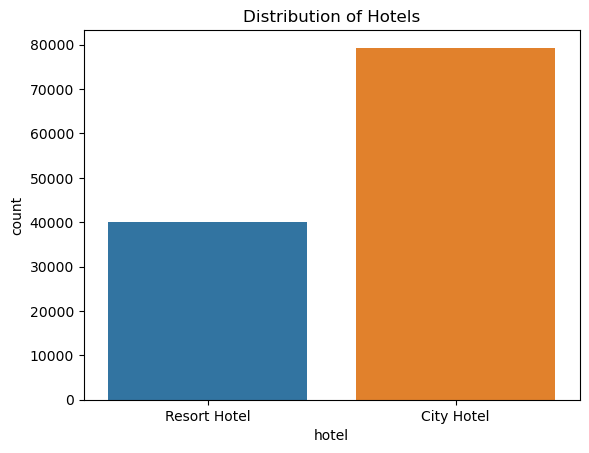

In [15]:
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Hotels')
plt.show()


In [16]:
cancellation_rate_by_hotel = df.groupby('hotel')['is_canceled'].mean()
print(cancellation_rate_by_hotel)


hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64


In [19]:
observed_table = pd.crosstab(df['is_canceled'], df['hotel'])

# Display the observed contingency table
print("Observed Contingency Table:")
print(observed_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(observed_table)

# Display the results
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 

Observed Contingency Table:
hotel        City Hotel  Resort Hotel
is_canceled                          
0                 46228         28938
1                 33102         11122

Chi-squared Test Statistics:
Chi2: 2224.924903923313
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
[[49944.8762878 25221.1237122]
 [29385.1237122 14838.8762878]]


# Lead time

In [23]:
df['lead_time'].isnull().sum()

0

In [20]:
print(df['lead_time'].describe())


count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


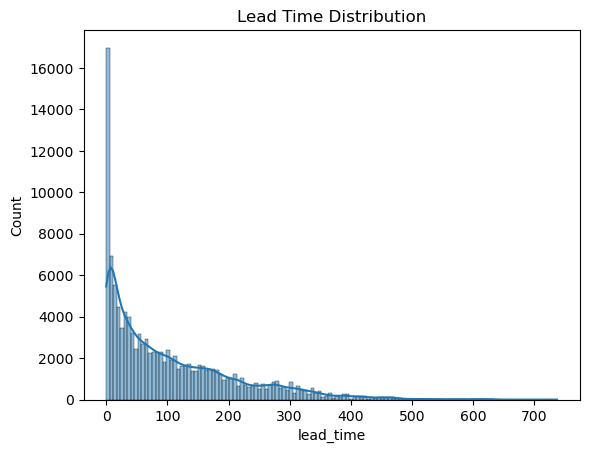

In [21]:
sns.histplot(df['lead_time'], kde=True)
plt.title('Lead Time Distribution')
plt.show()


In [22]:
df_lead_time = df.copy()
df_lead_time['lead_time_month'] = df_lead_time['lead_time'] // 30 #converting lead time (days) to months
df_lead_time = df_lead_time.groupby(['lead_time_month','is_canceled']).agg({'hotel':'count'}).reset_index() #number of bookings canceled or not in each hotels according to each lead time
df_lead_time = df_lead_time.rename(columns={'hotel':'total'})
df_lead_time['total_guests'] = df_lead_time.groupby(['lead_time_month'])['total'].transform('sum')
df_lead_time['cancel_percentage'] = (df_lead_time['total'] / df_lead_time['total_guests']) * 100
df_lead_time = df_lead_time.sort_values('cancel_percentage', ascending=False)
df_lead_time.pivot_table(index='lead_time_month', columns="is_canceled", values="cancel_percentage")

is_canceled,0,1
lead_time_month,,
0,81.754146,18.245854
1,63.659629,36.340371
2,60.262455,39.737545
3,55.961814,44.038186
4,56.403270,43.596730
5,53.797548,46.202452
6,55.274188,44.725812
7,53.078508,46.921492
8,44.854651,55.145349


# Arrival Date Year

In [28]:
df['arrival_date_year'].isnull().sum()

0

In [25]:
arrival_year_counts = df['arrival_date_year'].value_counts()
arrival_year_counts

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

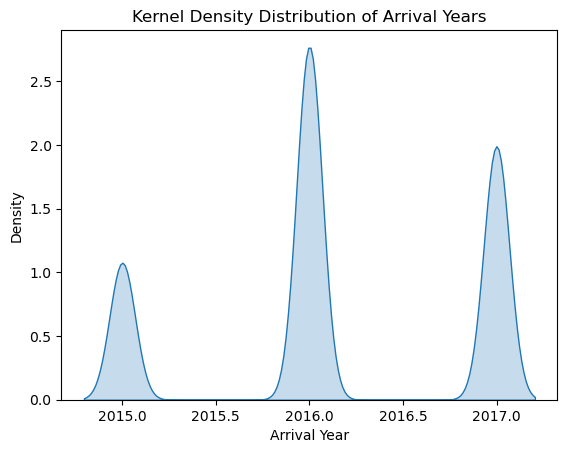

In [27]:
sns.kdeplot(data=df, x='arrival_date_year', fill=True)
plt.title('Kernel Density Distribution of Arrival Years')
plt.xlabel('Arrival Year')
plt.ylabel('Density')
plt.show()

In [31]:
cancellation_rate_by_year = df.groupby('arrival_date_year')['is_canceled'].mean()
cancellation_rate_by_year

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

# Arrival Date Month

In [32]:
df['arrival_date_month'].isnull().sum()

0

In [34]:
arrival_month_counts = df['arrival_date_month'].value_counts()
arrival_month_counts

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [35]:
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
    'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter'
}

# Map the months to seasons and then group by season
season_counts = df['arrival_date_month'].map(month_to_season).value_counts()

print(season_counts)

Summer    37477
Spring    32674
Autumn    28462
Winter    20777
Name: arrival_date_month, dtype: int64


In [36]:
contingency_table = pd.crosstab(df['arrival_date_month'], df['is_canceled'])

# Display the observed contingency table
print("Observed Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

Observed Contingency Table:
is_canceled            0     1
arrival_date_month            
April               6565  4524
August              8638  5239
December            4409  2371
February            5372  2696
January             4122  1807
July                7919  4742
June                6404  4535
March               6645  3149
May                 7114  4677
November            4672  2122
October             6914  4246
September           6392  4116

Chi-squared Test Statistics:
Chi2: 588.6917536476619
P-value: 3.671822609327152e-119
Degrees of Freedom: 11

Expected Frequencies:
[[6981.45384036 4107.54615964]
 [8736.73324399 5140.26675601]
 [4268.57760281 2511.42239719]
 [5079.48143061 2988.51856939]
 [3732.80185945 2196.19814055]
 [7971.15944384 4689.84055616]
 [6887.01628277 4051.98371723]
 [6166.14292654 3627.85707346]
 [7423.42160985 4367.57839015]
 [4277.39177486 2516.60822514]
 [7026.15428428 4133.84571572]
 [6615.66570064 3892.33429936]]


In [39]:
cancel_month = df.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='percentage')
cancel_percentage = cancel_month.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(cancel_percentage)


                                percentage
arrival_date_month is_canceled            
April              0             59.202814
                   1             40.797186
August             0             62.246883
                   1             37.753117
December           0             65.029499
                   1             34.970501
February           0             66.584036
                   1             33.415964
January            0             69.522685
                   1             30.477315
July               0             62.546402
                   1             37.453598
June               0             58.542828
                   1             41.457172
March              0             67.847662
                   1             32.152338
May                0             60.334153
                   1             39.665847
November           0             68.766559
                   1             31.233441
October            0             61.953405
           

# Week Number & Day of The Month

In [40]:
df['arrival_date_week_number'].isnull().sum()

0

In [41]:
df['arrival_date_day_of_month'].isnull().sum()

0

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

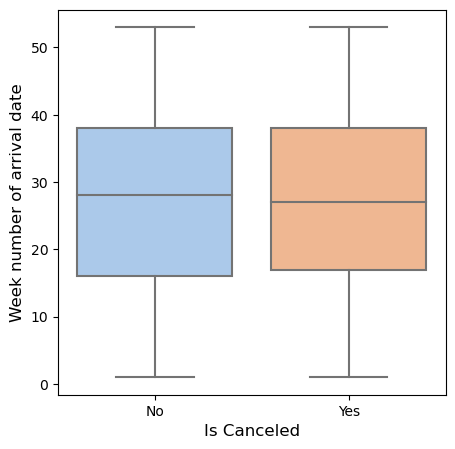

In [43]:
plt.figure(figsize=(5, 5))
fig=sns.boxplot(x='is_canceled', y='arrival_date_week_number', data=df, palette='pastel')
plt.ylabel('Week number of arrival date', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)
fig.set_xticklabels(['No', 'Yes'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

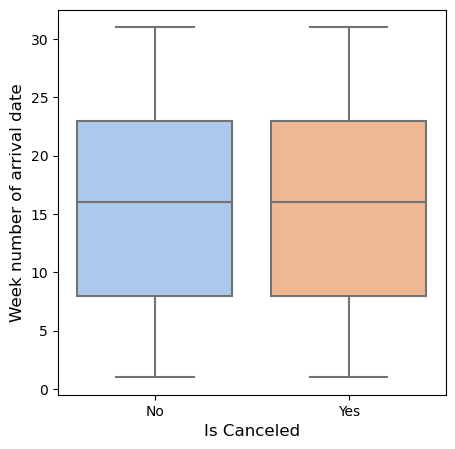

In [44]:
plt.figure(figsize=(5, 5))
fig=sns.boxplot(x='is_canceled', y='arrival_date_day_of_month', data=df, palette='pastel')
plt.ylabel('Week number of arrival date', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)
fig.set_xticklabels(['No', 'Yes'])

# Stays in Weekends & Weeknights

In [49]:
df['stays_in_weekend_nights'].isnull().sum()

0

In [50]:
df['stays_in_week_nights'].isnull().sum()

0

In [45]:
df.corr(method='pearson')["stays_in_weekend_nights"]["is_canceled"]

-0.0017910780782638134

In [46]:
df.corr(method='pearson')["stays_in_week_nights"]["is_canceled"]

0.024764629045870484

In [51]:
df.corr(method='pearson')["stays_in_week_nights"]["stays_in_weekend_nights"]

0.4989688184955315

Text(0.5, 0, 'Is Canceled')

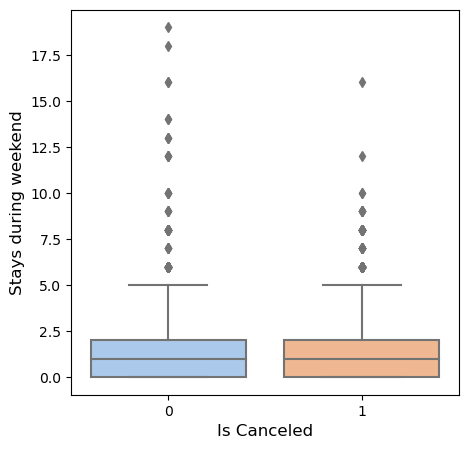

In [47]:
plt.figure(figsize=(5, 5))
fig=sns.boxplot(x="is_canceled", y="stays_in_weekend_nights",data=df, palette='pastel')
plt.ylabel('Stays during weekend', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)


Text(0.5, 0, 'Is Canceled')

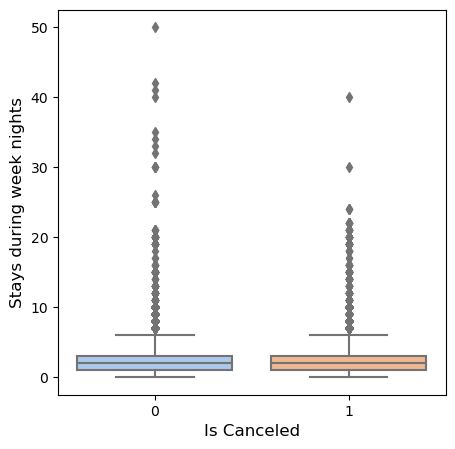

In [48]:
plt.figure(figsize=(5, 5))
fig=sns.boxplot(x="is_canceled", y="stays_in_week_nights",data=df, palette='pastel')
plt.ylabel('Stays during week nights', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)

# Adults

In [52]:
df['adults'].isnull().sum()

0

In [53]:
df["adults"].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

C:\Users\youss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adults', ylabel='Density'>

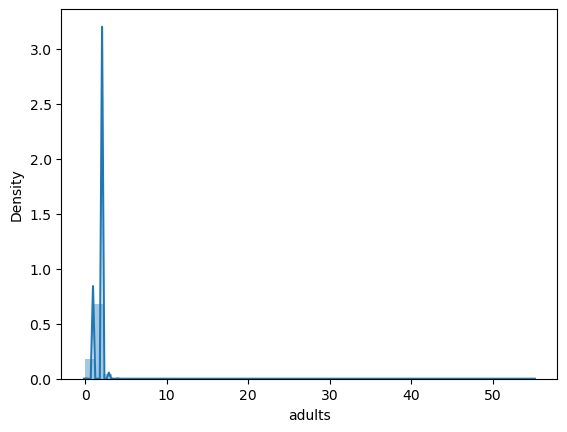

In [54]:
sns.distplot(df["adults"])

In [55]:
cancel_year = df.groupby(['adults', 'is_canceled']).size().to_frame(name='count')
cancel_percentage = cancel_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(cancel_percentage)


                         count
adults is_canceled            
0      0             72.952854
       1             27.047146
1      0             71.016633
       1             28.983367
2      0             60.684657
       1             39.315343
3      0             65.317639
       1             34.682361
4      0             74.193548
       1             25.806452
5      1            100.000000
6      1            100.000000
10     1            100.000000
20     1            100.000000
26     1            100.000000
27     1            100.000000
40     1            100.000000
50     1            100.000000
55     1            100.000000


# Children & Babies

In [56]:
df["children"].isnull().sum()

4

In [57]:
df["babies"].isnull().sum()

0

In [58]:
df["children"].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [59]:
df["babies"].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

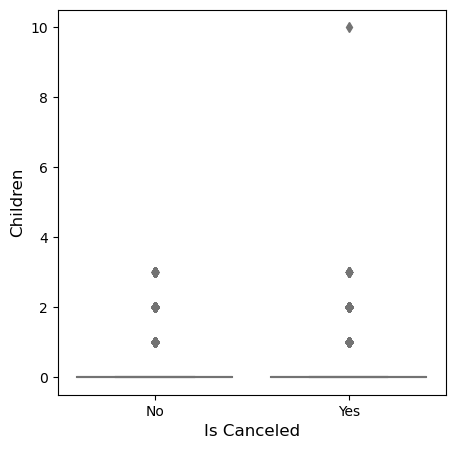

In [61]:
plt.figure(figsize=(5, 5))
fig=sns.boxplot(x='is_canceled', y='children', data=df, palette='pastel')
plt.ylabel('Children', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)
fig.set_xticklabels(['No', 'Yes'])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

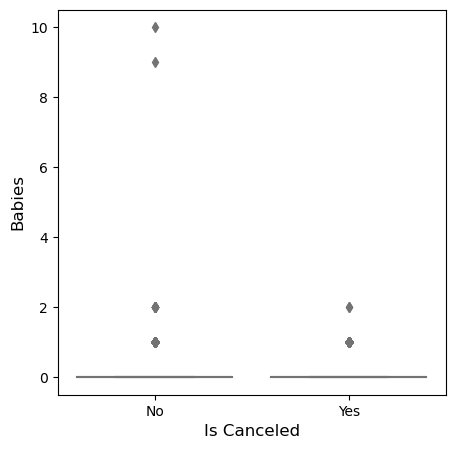

In [62]:
plt.figure(figsize=(5, 5))
fig=sns.boxplot(x='is_canceled', y='babies', data=df, palette='pastel')
plt.ylabel('Babies', fontsize=12)
plt.xlabel('Is Canceled', fontsize=12)
fig.set_xticklabels(['No', 'Yes'])

# Meal Type

In [63]:
df["meal"].isnull().sum()

0

In [64]:
df["meal"].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [65]:
contingency_table = pd.crosstab(df['meal'], df['is_canceled'])

# Display the observed contingency table
print("Observed Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

Observed Contingency Table:
is_canceled      0      1
meal                     
BB           57800  34510
FB             320    478
HB            9479   4984
SC            6684   3966
Undefined      883    286

Chi-squared Test Statistics:
Chi2: 304.23617668200444
P-value: 1.3212351959124216e-64
Degrees of Freedom: 4

Expected Frequencies:
[[58116.87293743 34193.12706257]
 [  502.40780635   295.59219365]
 [ 9105.66930229  5357.33069771]
 [ 6705.06658849  3944.93341151]
 [  735.98336544   433.01663456]]


In [66]:
cancel_year = df.groupby(['meal', 'is_canceled']).size().to_frame(name='count')
cancel_percentage = cancel_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(cancel_percentage)

                           count
meal      is_canceled           
BB        0            62.615101
          1            37.384899
FB        0            40.100251
          1            59.899749
HB        0            65.539653
          1            34.460347
SC        0            62.760563
          1            37.239437
Undefined 0            75.534645
          1            24.465355


# Country

In [71]:
df["country"].isnull().sum()

488

In [72]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

# Market Segment

In [75]:
df["market_segment"].isnull().sum()

0

In [74]:
df["market_segment"].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [73]:
contingency_table = pd.crosstab(df['market_segment'], df['is_canceled'])

# Display the observed contingency table
print("Observed Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

Observed Contingency Table:
is_canceled         0      1
market_segment              
Aviation          185     52
Complementary     646     97
Corporate        4303    992
Direct          10672   1934
Groups           7714  12097
Offline TA/TO   15908   8311
Online TA       35738  20739
Undefined           0      2

Chi-squared Test Statistics:
Chi2: 8497.224089832987
P-value: 0.0
Degrees of Freedom: 7

Expected Frequencies:
[[1.49211341e+02 8.77886590e+01]
 [4.67780702e+02 2.75219298e+02]
 [3.33364578e+03 1.96135422e+03]
 [7.93653234e+03 4.66946766e+03]
 [1.24726830e+04 7.33831698e+03]
 [1.52478880e+04 8.97111195e+03]
 [3.55569996e+04 2.09200004e+04]
 [1.25916743e+00 7.40832566e-01]]


In [77]:
cancel_year = df.groupby(['market_segment','is_canceled']).size().to_frame(name='count')
cancel_percentage = cancel_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(cancel_percentage)

                                 count
market_segment is_canceled            
Aviation       0             78.059072
               1             21.940928
Complementary  0             86.944818
               1             13.055182
Corporate      0             81.265345
               1             18.734655
Direct         0             84.658099
               1             15.341901
Groups         0             38.937964
               1             61.062036
Offline TA/TO  0             65.683967
               1             34.316033
Online TA      0             63.278857
               1             36.721143
Undefined      1            100.000000


<AxesSubplot:xlabel='market_segment', ylabel='lead_time'>

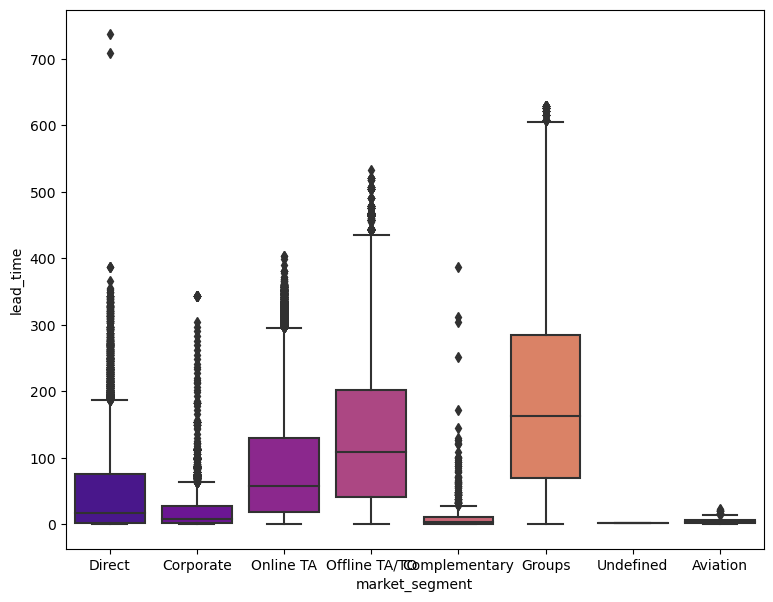

In [78]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='market_segment', y='lead_time', data=df, palette='plasma')

# Distribution Channel

In [79]:
df["distribution_channel"].isnull().sum()

0

In [80]:
df["distribution_channel"].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [81]:
contingency_table = pd.crosstab(df['distribution_channel'], df['is_canceled'])

# Display the observed contingency table
print("Observed Contingency Table:")
print(contingency_table)

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

Observed Contingency Table:
is_canceled               0      1
distribution_channel              
Corporate              5203   1474
Direct                12088   2557
GDS                     156     37
TA/TO                 57718  40152
Undefined                 1      4

Chi-squared Test Statistics:
Chi2: 3745.794123751679
P-value: 0.0
Degrees of Freedom: 4

Expected Frequencies:
[[4.20373048e+03 2.47326952e+03]
 [9.22025354e+03 5.42474646e+03]
 [1.21509657e+02 7.14903426e+01]
 [6.16173584e+04 3.62526416e+04]
 [3.14791859e+00 1.85208141e+00]]


In [82]:
cancel_year = df.groupby(['distribution_channel','is_canceled']).size().to_frame(name='count')
cancel_percentage = cancel_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(cancel_percentage)

                                      count
distribution_channel is_canceled           
Corporate            0            77.924217
                     1            22.075783
Direct               0            82.540116
                     1            17.459884
GDS                  0            80.829016
                     1            19.170984
TA/TO                0            58.974149
                     1            41.025851
Undefined            0            20.000000
                     1            80.000000


# Repeated Guest

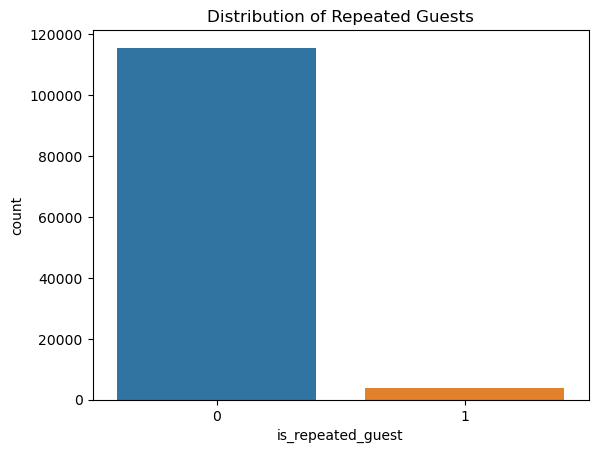

In [4]:

sns.countplot(x='is_repeated_guest', data=df)
plt.title('Distribution of Repeated Guests')
plt.show()

In [5]:
repeated_guests_percentages_by_hotel_type = df.groupby('hotel')['is_repeated_guest'].mean()
print(repeated_guests_percentages_by_hotel_type)

hotel
City Hotel      0.025615
Resort Hotel    0.044383
Name: is_repeated_guest, dtype: float64


In [6]:
observed_table = pd.crosstab(df['is_canceled'], df['is_repeated_guest'])

In [7]:
print("Observed Contingency Table:")
print(observed_table)

Observed Contingency Table:
is_repeated_guest      0     1
is_canceled                   
0                  71908  3258
1                  43672   552


In [8]:
chi2, p, dof, expected = chi2_contingency(observed_table)

In [9]:
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 



Chi-squared Test Statistics:
Chi2: 857.4063180373694
P-value: 1.7841252215934033e-188
Degrees of Freedom: 1

Expected Frequencies:
[[72767.28603736  2398.71396264]
 [42812.71396264  1411.28603736]]


# Previous Cancellations

In [10]:
df['previous_cancellations'].isnull().sum()

0

In [11]:
print(df['previous_cancellations'].describe())

count    119390.000000
mean          0.087118
std           0.844336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: previous_cancellations, dtype: float64


In [12]:
observed_table = pd.crosstab(df['previous_cancellations'], df['is_canceled'])
print("Observed Contingency Table:")
print(observed_table)


Observed Contingency Table:
is_canceled                 0      1
previous_cancellations              
0                       74624  38282
1                         337   5714
2                          78     38
3                          45     20
4                          24      7
5                          17      2
6                          15      7
11                         25     10
13                          1     11
14                          0     14
19                          0     19
21                          0      1
24                          0     48
25                          0     25
26                          0     26


In [13]:
chi2, p, dof, expected = chi2_contingency(observed_table)

In [14]:
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 


Chi-squared Test Statistics:
Chi2: 9274.833707930893
P-value: 0.0
Degrees of Freedom: 14

Expected Frequencies:
[[7.10837792e+04 4.18222208e+04]
 [3.80961107e+03 2.24138893e+03]
 [7.30317112e+01 4.29682888e+01]
 [4.09229416e+01 2.40770584e+01]
 [1.95170952e+01 1.14829048e+01]
 [1.19620906e+01 7.03790937e+00]
 [1.38508418e+01 8.14915822e+00]
 [2.20354301e+01 1.29645699e+01]
 [7.55500461e+00 4.44499539e+00]
 [8.81417204e+00 5.18582796e+00]
 [1.19620906e+01 7.03790937e+00]
 [6.29583717e-01 3.70416283e-01]
 [3.02200184e+01 1.77799816e+01]
 [1.57395929e+01 9.26040707e+00]
 [1.63691766e+01 9.63082335e+00]]


# Previous Bookings Not Cancelled

In [15]:
df['previous_bookings_not_canceled'].isnull().sum()

0

In [16]:
df['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [17]:
print(df['previous_bookings_not_canceled'].describe())

count    119390.000000
mean          0.137097
std           1.497437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.000000
Name: previous_bookings_not_canceled, dtype: float64


In [18]:
(df['previous_bookings_not_canceled']/(df['previous_bookings_not_canceled']+df['previous_cancellations']))*100

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Length: 119390, dtype: float64

In [19]:
valueprevious_cancellations=df['previous_cancellations'].sum()
valueprevious_cancellations

10401

In [20]:

valuebookings_notcancelled=df['previous_bookings_not_canceled'].sum()
valuebookings_notcancelled

16368

In [21]:
PreviousCancellationPercentage=(valueprevious_cancellations/(valuebookings_notcancelled+valueprevious_cancellations))*100
PreviousNotCanceledPercentage=(valuebookings_notcancelled/(valuebookings_notcancelled+valueprevious_cancellations))*100
print('Previous Cancellations Percentage:',PreviousCancellationPercentage)
print('Previous Bookings Not Cancelled Percentage:',PreviousNotCanceledPercentage)

Previous Cancellations Percentage: 38.85464529866637
Previous Bookings Not Cancelled Percentage: 61.14535470133363


In [22]:
correlation = df['previous_bookings_not_canceled'].corr(df['is_canceled'])
print(correlation)

-0.05735772316594613


In [23]:
correlation = df['previous_cancellations'].corr(df['is_canceled'])
print(correlation)


0.1101328082228435


# Reserved Room Type

In [25]:
df['reserved_room_type'].isnull().sum()

0

In [26]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [27]:
data=np.array([85994,19201,6535,2897,2094,1118,932,601,12,6])

In [28]:
mylabels = ['A','D','E','F','G','B','C','H','P','L']

In [29]:
ReservedRooms = df['reserved_room_type']

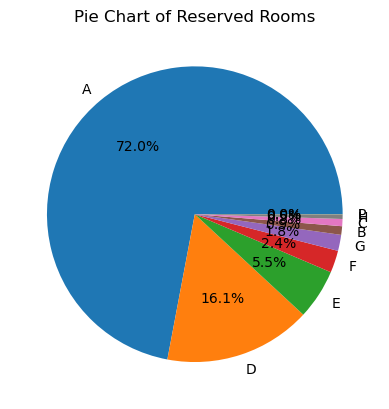

In [30]:
plt.pie(data, labels=mylabels, autopct='%1.1f%%')
plt.title('Pie Chart of Reserved Rooms')
plt.show()


In [31]:
observed_table = pd.crosstab(df['reserved_room_type'], df['is_canceled'])
print("Observed Contingency Table:")
print(observed_table)

Observed Contingency Table:
is_canceled             0      1
reserved_room_type              
A                   52364  33630
B                     750    368
C                     624    308
D                   13099   6102
E                    4621   1914
F                    2017    880
G                    1331    763
H                     356    245
L                       4      2
P                       0     12


In [32]:

chi2, p, dof, expected = chi2_contingency(observed_table)

In [33]:

print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 



Chi-squared Test Statistics:
Chi2: 647.8350973363271
P-value: 1.121956218424043e-133
Degrees of Freedom: 9

Expected Frequencies:
[[5.41404222e+04 3.18535778e+04]
 [7.03874596e+02 4.14125404e+02]
 [5.86772024e+02 3.45227976e+02]
 [1.20886370e+04 7.11236305e+03]
 [4.11432959e+03 2.42067041e+03]
 [1.82390403e+03 1.07309597e+03]
 [1.31834830e+03 7.75651696e+02]
 [3.78379814e+02 2.22620186e+02]
 [3.77750230e+00 2.22249770e+00]
 [7.55500461e+00 4.44499539e+00]]


# Assigned Room Type

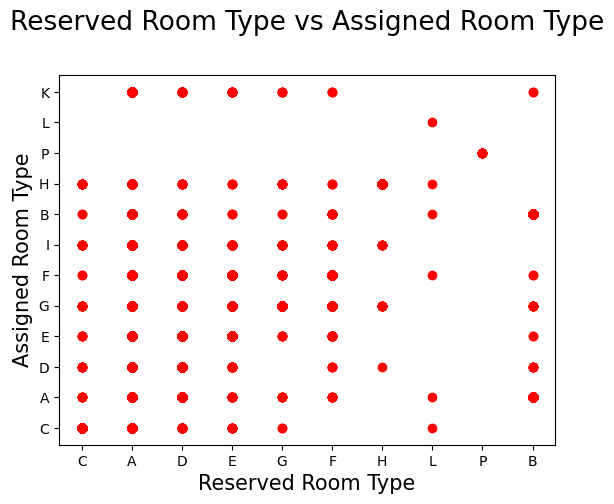

In [34]:
plt.scatter(df['reserved_room_type'], df['assigned_room_type'],color='red') 
plt.xlabel("Reserved Room Type",fontsize=15)  
plt.ylabel("Assigned Room Type",fontsize=15) 
plt.rcParams["font.family"] = "serif"  
plt.title("Reserved Room Type vs Assigned Room Type",fontsize=19,y=1.1) 
plt.show()


# Booking Changes

In [35]:
print(df['booking_changes'].describe())

count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64


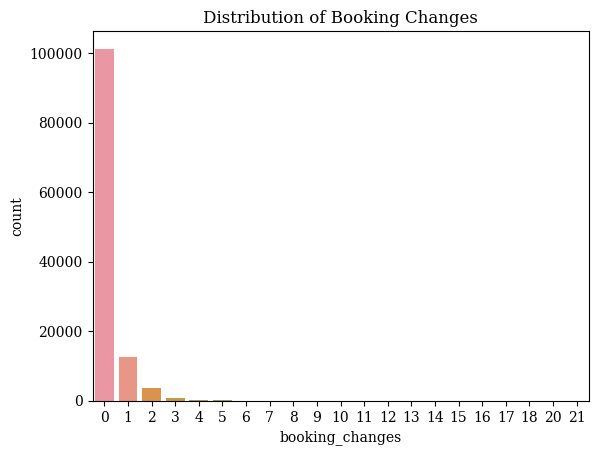

In [36]:
sns.countplot(x='booking_changes', data=df)
plt.title('Distribution of Booking Changes')
plt.show()


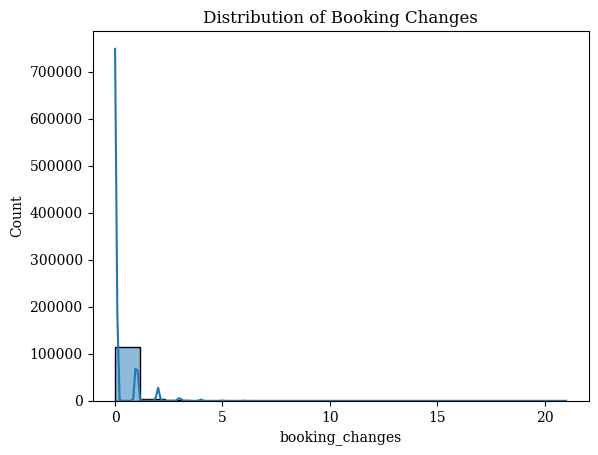

In [37]:
sns.histplot(df['booking_changes'], kde=True)
plt.title('Distribution of Booking Changes')
plt.show()


In [38]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [39]:

correlation = df['booking_changes'].corr(df['is_canceled'])
print(correlation)

-0.14438099106132385


# Deposit Type

In [40]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

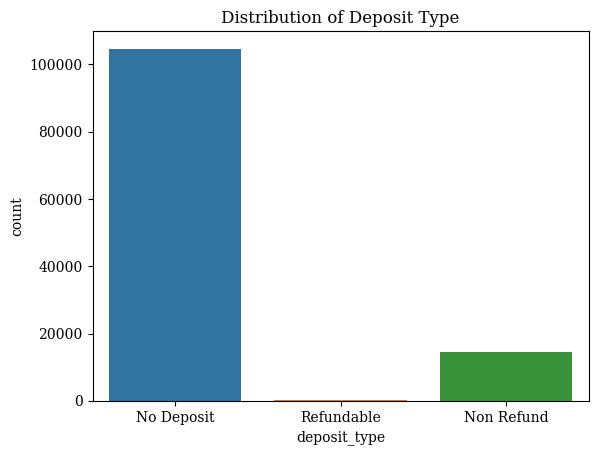

In [41]:
sns.countplot(x='deposit_type', data=df)
plt.title('Distribution of Deposit Type')
plt.show()


In [43]:
data = np.array([104641,14587,162])
mylabels = ['No Deposit','Non Refundable Deposit','Refundable']

In [44]:
Deposit_type = df['reserved_room_type']

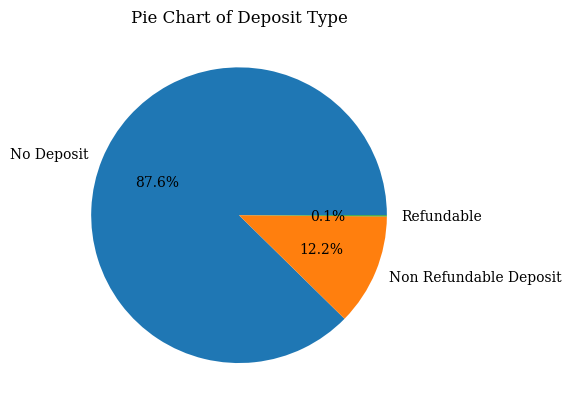

In [45]:
plt.pie(data, labels=mylabels, autopct='%1.1f%%')
plt.title('Pie Chart of Deposit Type')
plt.show()

In [46]:
observed_table = pd.crosstab(df['deposit_type'], df['is_canceled'])
print("Observed Contingency Table:")
print(observed_table)

Observed Contingency Table:
is_canceled       0      1
deposit_type              
No Deposit    74947  29694
Non Refund       93  14494
Refundable      126     36


In [47]:

chi2, p, dof, expected = chi2_contingency(observed_table)

In [48]:
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 


Chi-squared Test Statistics:
Chi2: 27677.32924132434
P-value: 0.0
Degrees of Freedom: 2

Expected Frequencies:
[[6.58802698e+04 3.87607302e+04]
 [9.18373768e+03 5.40326232e+03]
 [1.01992562e+02 6.00074378e+01]]


# Agent

In [49]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [50]:
df['agent'].isnull().sum()

16340

# Company 

In [51]:
df['company'].isnull().sum()

112593

# Days in waiting list

In [52]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [53]:
df['days_in_waiting_list'].describe()

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x235beeb6b20>,
 'caps': [<matplotlib.lines.Line2D at 0x235beec7100>,
 'boxes': [<matplotlib.lines.Line2D at 0x235beeb6850>],
 'medians': [<matplotlib.lines.Line2D at 0x235beec76a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235beec7970>],
 'means': []}

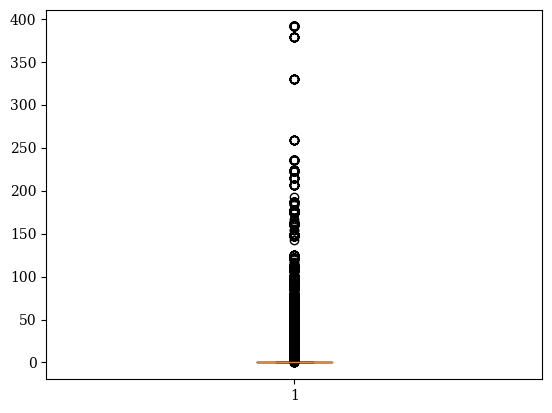

In [54]:
plt.boxplot(df['days_in_waiting_list'])

In [55]:
correlation = df['days_in_waiting_list'].corr(df['is_canceled'])
print(correlation)


0.054185824117780376


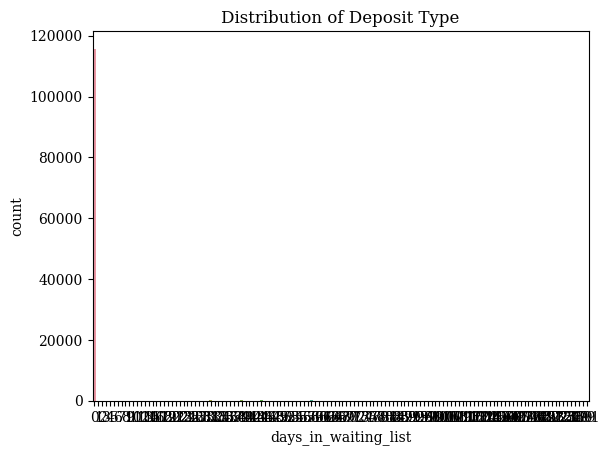

In [56]:
sns.countplot(x='days_in_waiting_list', data=df)
plt.title('Distribution of Deposit Type')
plt.show()

# Customer Type

In [57]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

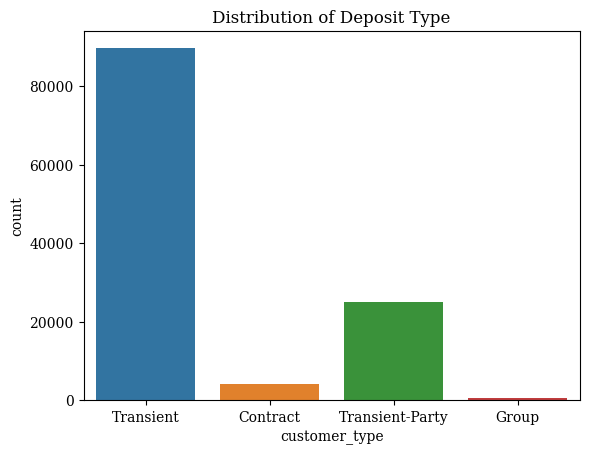

In [58]:

sns.countplot(x='customer_type', data=df)
plt.title('Distribution of Deposit Type')
plt.show()

In [59]:
    observed_table = pd.crosstab(df['customer_type'], df['is_canceled'])
print("Observed Contingency Table:")
print(observed_table)

Observed Contingency Table:
is_canceled          0      1
customer_type                
Contract          2814   1262
Group              518     59
Transient        53099  36514
Transient-Party  18735   6389


In [60]:
chi2, p, dof, expected = chi2_contingency(observed_table)

In [61]:
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 



Chi-squared Test Statistics:
Chi2: 2222.50416048372
P-value: 0.0
Degrees of Freedom: 3

Expected Frequencies:
[[ 2566.18323143  1509.81676857]
 [  363.26980484   213.73019516]
 [56418.88565206 33194.11434794]
 [15817.66131167  9306.33868833]]


# ADR

In [62]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

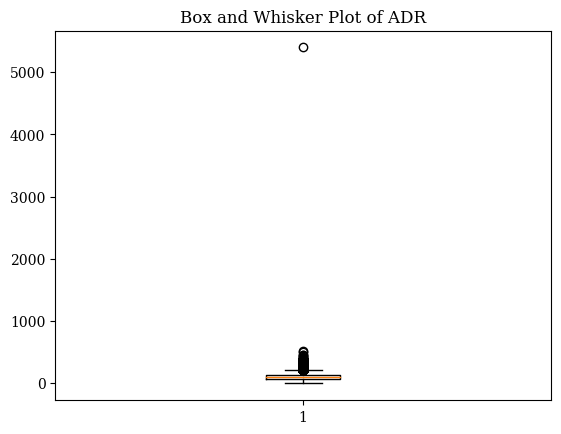

In [63]:
plt.boxplot(df['adr'])
plt.title('Box and Whisker Plot of ADR')
plt.show()

In [64]:
df['adr'].corr(df['is_canceled'])

0.0475565978803858

# Required Car Parking Spaces

In [66]:
df['required_car_parking_spaces'].min()



0

In [67]:
df['required_car_parking_spaces'].max()

8

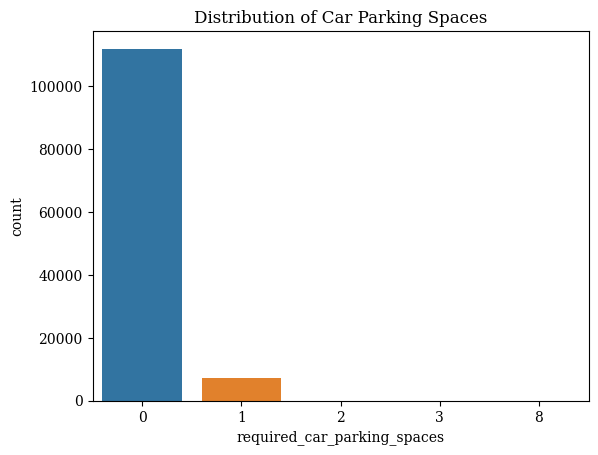

In [68]:
sns.countplot(x='required_car_parking_spaces', data=df)
plt.title('Distribution of Car Parking Spaces')
plt.show()

In [69]:
df['required_car_parking_spaces'].corr(df['is_canceled'])

-0.19549781749450643

# Total Special Requests

In [70]:
df['total_of_special_requests'].describe()

count    119390.000000
mean          0.571363
std           0.792798
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64

In [71]:
df['total_of_special_requests'].corr(df['is_canceled'])

-0.2346577739690237

# Reservation Status

In [72]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [73]:

data = np.array([75166,43017,1207])

In [74]:
mylabels = ['Check-Out','Canceled','No-Show']

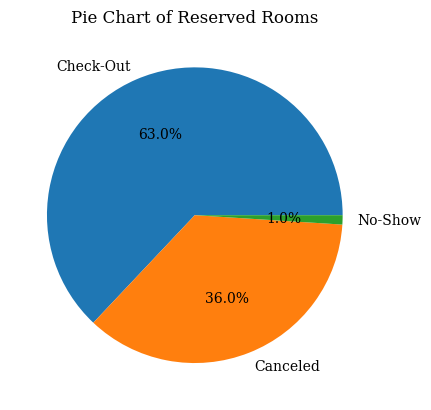

In [75]:
plt.pie(data, labels=mylabels, autopct='%1.1f%%')
plt.title('Pie Chart of Reserved Rooms')
plt.show()

In [76]:
observed_table = pd.crosstab(df['customer_type'], df['is_canceled'])
print("Observed Contingency Table:")
print(observed_table)

Observed Contingency Table:
is_canceled          0      1
customer_type                
Contract          2814   1262
Group              518     59
Transient        53099  36514
Transient-Party  18735   6389


In [77]:
chi2, p, dof, expected = chi2_contingency(observed_table)

In [78]:
print("\nChi-squared Test Statistics:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected) 


Chi-squared Test Statistics:
Chi2: 2222.50416048372
P-value: 0.0
Degrees of Freedom: 3

Expected Frequencies:
[[ 2566.18323143  1509.81676857]
 [  363.26980484   213.73019516]
 [56418.88565206 33194.11434794]
 [15817.66131167  9306.33868833]]


# Reservation Status Date

In [79]:
df['reservation_status_date'].value_counts()

21/10/2015    1461
06/07/2015     805
25/11/2016     790
01/01/2015     763
18/01/2016     625
              ... 
27/02/2015       1
25/04/2015       1
11/03/2015       1
14/06/2015       1
12/02/2015       1
Name: reservation_status_date, Length: 926, dtype: int64